In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
from tqdm import tqdm

In [2]:
dataset_folder = "Brazil_Election_2014"
meshblock_filename = "meshblocks.shp"
data_id = "INDEX"
meshblocks_id = "code_muni"
data_path = f"H:/Google Drive/Doutorado/Datasets_IJGIS/{dataset_folder}/data.csv"
fold_path = f"H:/Google Drive/Doutorado/Datasets_IJGIS/{dataset_folder}/folds/SRBuffer"
meshblock_path = f"H:/Google Drive/Doutorado/Datasets_IJGIS/{dataset_folder}/meshblocks/{meshblock_filename}"
output_path = f"H:/Google Drive/Doutorado/Datasets_IJGIS/{dataset_folder}"

In [3]:
def map_color(row):
    if row['Type'] == 'discarded':
        return '#AFABAB'
    elif row['Type'] == 'test':
        return '#9FC5E8'
    elif row['Type'] == 'removing_buffer':
        return '#EA9999'
    elif row['Type'] == 'train':
        return '#B6D7A8'
    elif row["Type"] == "missing":
        return "#ffffffff"
    else:
        return '#ffffffff'


  0%|          | 0/28 [00:00<?, ?it/s]H:\anaconda3\envs\phd_gists\lib\site-packages\geopandas\plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
  4%|▎         | 1/28 [00:08<04:02,  8.98s/it]H:\anaconda3\envs\phd_gists\lib\site-packages\geopandas\plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
  7%|▋         | 2/28 [00:22<05:09, 11.90s/it]H:\anaconda3\envs\phd_gists\lib\site-packages\geopandas\plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
 11%|█         | 3/28 [00:39<05:48, 13.94s/it]H:\anaconda3\envs\phd_gists\lib\site-packages\geopandas\plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
 14%|█▍        | 4/28 [00:56<06:02, 15.11s/it]H:\anaconda3\envs\phd_gists\lib\site-packages\geopandas\plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.


FileNotFoundError: [Errno 2] No such file or directory: 'H:/Google Drive/Doutorado/Datasets_IJGIS/Brazil_Election_2014/folds/SRBuffer\\execution_time.txt\\split_data.json'

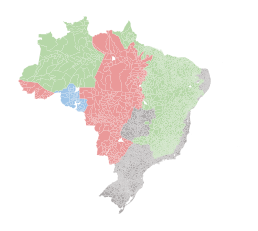

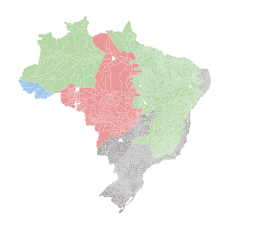

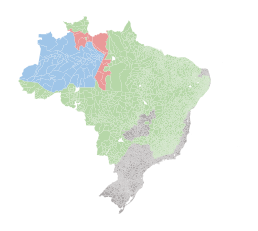

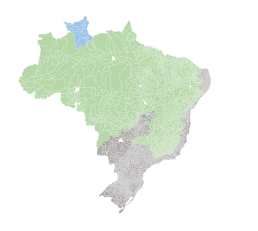

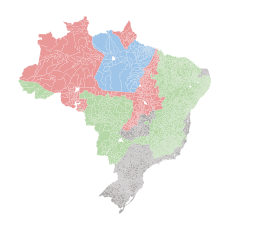

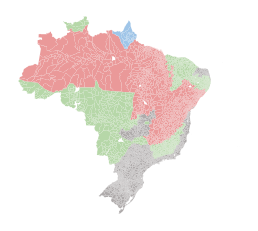

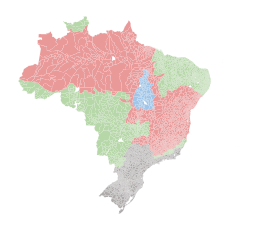

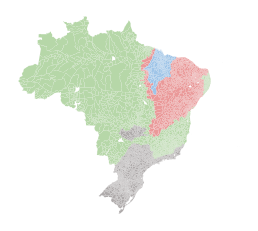

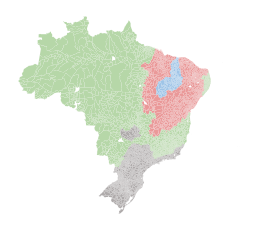

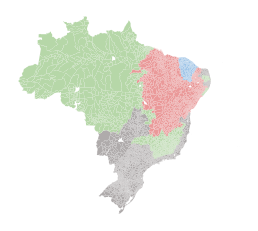

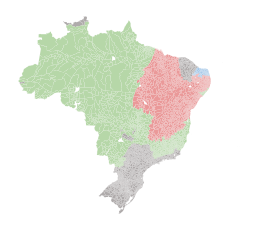

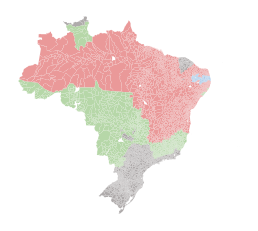

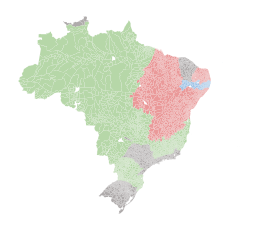

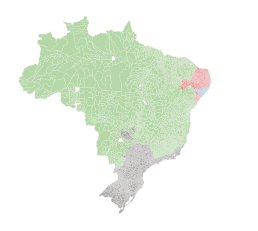

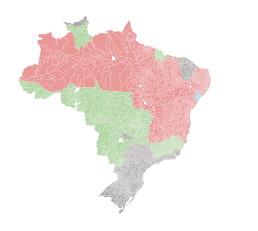

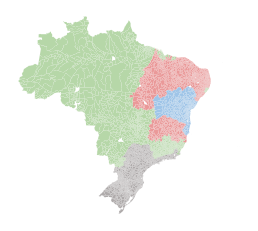

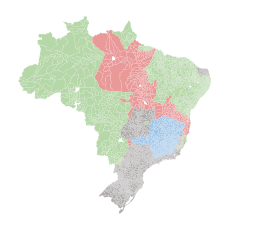

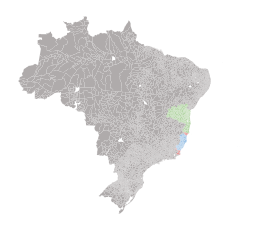

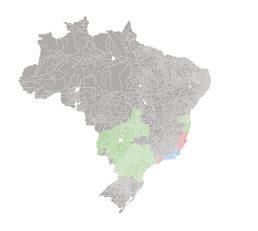

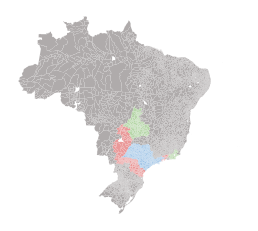

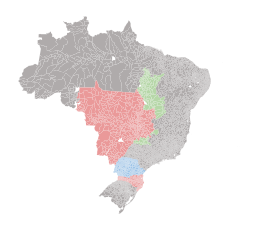

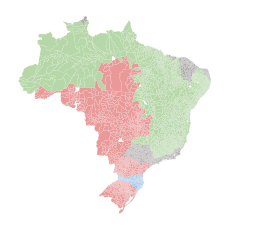

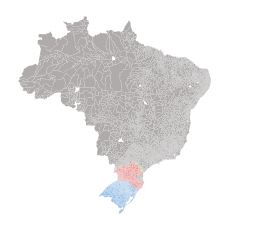

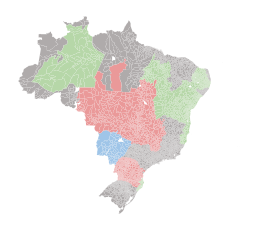

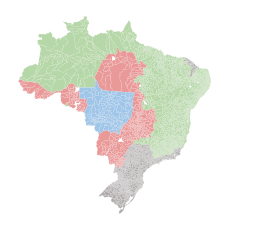

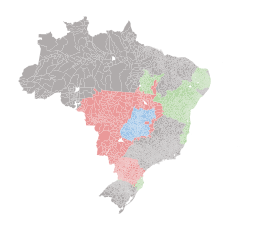

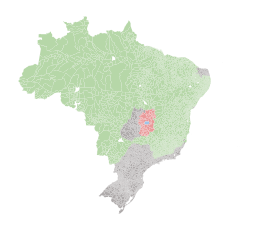

In [4]:
fold_folders = [os.path.join(fold_path,c) for c in os.listdir(fold_path)]
meshblocks = gpd.read_file(meshblock_path)
meshblocks.set_index(meshblocks_id, inplace=True)
data = pd.read_csv(data_path, index_col=data_id)
missing = [idx for idx in meshblocks.index if idx not in data.index]
for fold_path in tqdm(fold_folders):
    
    meshblocks["Type"] = [0] * len(meshblocks)
    with open(os.path.join(fold_path, "split_data.json"), 'r') as fp:
        split_data = json.load(fp)
    split_data["missing"] = missing
    
    for key in split_data.keys():
        joiner_index = [idx for idx in split_data[key] if idx in meshblocks.index]
        meshblocks.loc[joiner_index, "Type"] = key
    
    #meshblocks["Type"].replace(0, "train", inplace=True)
    fig, ax = plt.subplots(1, 1)
    color_list = meshblocks.apply(lambda row: map_color(row), axis=1)
    meshblocks.plot(column= 'Type', 
                   categorical=True, 
                   color=color_list, 
                   linewidth=.05, 
                   edgecolor='white',
                   legend=False, 
                   legend_kwds={'bbox_to_anchor': (.3, 1.05), 
                                'fontsize': 16, 
                                'frameon': False}, 
                   ax=ax)
    plt.axis('off')
    plt.savefig(os.path.join(fold_path, 'train_test_split.png'), dpi=1000)